<a href="https://colab.research.google.com/github/akhilnooney/Akhil/blob/master/Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informatics Internship Coding Challenge 

## Instructions:

1. Make a copy of this Colab notebook. 
2. Work on the problem given below. 
3. Write an email to the following email:
  - Rishov Chatterjee: rchatterjee@coh.org




## Predicting NSCLC (Non-Small Cell Lung Cancer) Patient Survival 

### Download the synthetic dataset:
### [dataset](https://drive.google.com/file/d/1mYXW8TLmZiGXXzxW179IYqEn6WaYuTcr/view)

### Learning About the Problem
Do a little research about NSCLC and see how you can use your insights as a guide towards exploring this problem.

### Exploratory Data Analysis
Before jumping into the machine learning aspect, try and learn about the variables that you have. Ask yourself what variables might be of value to consider as predictors of the Outcome target. If you know about data visualization, feel free to get creative with data visualizations here and explain their relevance to the problem.

### Data Preprocessing and Feature Engineering
Do any necessary steps to prepare your dataset's features for the machine learning aspect.

### ML Modeling
You are allowed to use more than one machine learning model for this problem, but be sure to explain why you chose the model (s) for this analysis. 

### Metrics
Show the performance metrics that you believe are most important to demonstrate for this kind of problem. Remember the metrics you choose can be key to determining the life of a patient suffering from NSCLC.

### Future Steps
Think about some of the implications in the analysis you did. What can you do in the future to assess those implications?

If you have any questions or want to brainstorm, please contact Rishov Chatterjee.

# New Section

# New Section

In [ ]:
# Do your analysis here.
import pandas as pd
data=[]
with open ("/content/sample_data/clinical.txt", "r") as file: #Reading Text File
      text = file.readlines() 
      for line in text: 
        name_string = line.replace('"', '') #To replace all commas with spaces
        data.append(name_string.strip()) 
df = pd.DataFrame([sub.split(",") for sub in data])#Create DataFrame
df_columns=df.iloc[0]
df=df.iloc[1:]
df.columns=df_columns
df.to_csv("lung cancer.csv")#Loaded File to CSV


In [ ]:
df[

NameError: ignored

In [ ]:
#Data Cleaning
import numpy as np
import matplotlib.pyplot as plt
df=df.drop_duplicates(df.columns).reset_index(drop=True)#To remove all duplicates
#Replacing null values in Tumor.size column
df['Tumor.Size']=pd.to_numeric(df["Tumor.Size"],errors='coerce')
df_T4=df[(df["T"]=="4") & (df['Tumor.Size'].notnull())]
T4_Avg=round(df_T4["Tumor.Size"].mean(),2)
df_T3=df[(df["T"]=="3") & (df['Tumor.Size'].notnull())]
T3_Avg=round(df_T3["Tumor.Size"].mean(),2)
df_T2b=df[(df["T"]=="2b") & (df['Tumor.Size'].notnull())]
T2b_Avg=round(df_T2b["Tumor.Size"].mean(),2)
df_T2a=df[((df["T"]=="2a") | (df["T"]=="2")) & (df['Tumor.Size'].notnull())]
T2a_Avg=round(df_T2a["Tumor.Size"].mean(),2)
df_T1b=df[(df["T"]=="1b") & (df['Tumor.Size'].notnull())]
T1b_Avg=round(df_T1b["Tumor.Size"].mean(),2)
df_T1a=df[(df["T"]=="1a") & (df['Tumor.Size'].notnull())]
T1a_Avg=round(df_T1a["Tumor.Size"].mean(),2)
Tumor_size={"1a":T1a_Avg,"1b":T1b_Avg,"2a":T2a_Avg,"2":T2a_Avg,"2b":T2b_Avg,"3":T3_Avg,"4":T4_Avg}
df2=df[pd.isnull(df["Tumor.Size"])]
df2["Tumor.Size"]=df2['T'].map(Tumor_size)
final_dict=dict(zip(df2["ID"],df2["Tumor.Size"]))
df["Tumor.Size"]=df["ID"].map(final_dict).fillna(df['Tumor.Size'])
#Performing Label Encoding
replace_smoker_region={'Outcome':{'Alive':1,'Dead':0},"Stage":{"1B":1,"IA":1,"IB":2,"IIA":3,"IIB":4,"IIIA":5,"IIIB":6,"IV":7,"IVB":8}}
df1=df.replace(replace_smoker_region)
dfDummies = pd.get_dummies(df1['Histology'], prefix = 'category')
df1= pd.concat([df1, dfDummies], axis=1)
#Replacing "UNK" values
unk_IVB=df1[(df1["Stage"]==8) & (df1["Tumor.Size"].notnull())]
Avg_IVB=round(unk_IVB["Tumor.Size"].mean(),2)
unk_IV=df1[(df1["Stage"]==7) & (df1["Tumor.Size"].notnull())]
Avg_IV=round(unk_IV["Tumor.Size"].mean(),2)
unk_IIIB=df1[(df1["Stage"]==6) & (df1["Tumor.Size"].notnull())]
Avg_IIIB=round(unk_IIIB["Tumor.Size"].mean(),2)
unk_IIIA=df1[(df1["Stage"]==5) & (df1["Tumor.Size"].notnull())]
Avg_IIIA=round(unk_IIIA["Tumor.Size"].mean(),2)
unk_IIB=df1[(df1["Stage"]==4) & (df1["Tumor.Size"].notnull())]
Avg_IIB=round(unk_IIB["Tumor.Size"].mean(),2)
UNK_AVG={8:Avg_IVB,7:Avg_IV,6:Avg_IIIB,5:Avg_IIIA,4:Avg_IIB}
df4=df1[pd.isnull(df1["Tumor.Size"])]
df4["Tumor.Size"]=df4["Stage"].map(UNK_AVG)
UNK_final_dict=dict(zip(df4["ID"],df4["Tumor.Size"]))
df1["Tumor.Size"]=df1["ID"].map(UNK_final_dict).fillna(df1["Tumor.Size"])
#Correlation Coefficient
#converted all rows to float
df1[["Survival.Months","Age","Grade","Num.Primaries","Radiation","Stage","Num.Mutated.Genes","Num.Mutations"]]=df1[["Survival.Months","Age","Grade","Num.Primaries","Radiation","Stage","Num.Mutated.Genes","Num.Mutations"]].astype(float)
print(f"Correlation_Coefficient \n \n {df1.corr()['Outcome']}")


Correlation_Coefficient 
 
 Outcome                             1.000000
Survival.Months                     0.200126
Age                                 0.195949
Grade                              -0.264501
Num.Primaries                       0.276045
Radiation                           0.102473
Stage                              -0.239580
Tumor.Size                         -0.107545
Num.Mutated.Genes                   0.129691
Num.Mutations                       0.134441
category_Adenocarcinoma            -0.210223
category_Large-cell carcinoma      -0.173196
category_Squamous cell carcinoma    0.336315
Name: Outcome, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
import numpy as np
df1["N"]=df1["N"].replace('NULL',np.nan).astype(float)#Replaced null values to float
df1["M"]=df1["M"].replace('NULL',np.nan).astype(float)

In [ ]:
df1.describe()

Outcome  ...  category_Squamous cell carcinoma
count  190.000000  ...                        190.000000
mean     0.210526  ...                          0.405263
std      0.408760  ...                          0.492240
min      0.000000  ...                          0.000000
25%      0.000000  ...                          0.000000
50%      0.000000  ...                          0.000000
75%      0.000000  ...                          1.000000
max      1.000000  ...                          1.000000

[8 rows x 15 columns]

In [ ]:
#df1["N"]=df1["N"].replace('NULL',np.nan).astype(float)
null_df=df1[df1["N"].isnull()]
T_df=df1[df1["N"].notnull()]
X=T_df.drop(["ID","T","N","M","Primary.Site","Histology"],axis=1).values
Y=T_df["N"].values
Y_predi=null_df.drop(["ID","T","N","M","Primary.Site","Histology"],axis=1).values

In [ ]:
#Performed RandomForest Classifier model to predict "N" missing values
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf.fit(X, Y)
N_Predict=clf.predict(Y_predi).tolist()
null_T=df1[df1["N"].isnull()]
null_T["N"]=N_Predict
pd.options.mode.chained_assignment = None
N_dic=dict(zip(null_T["ID"],null_T["N"]))
df1["N"]=df1["ID"].map(N_dic).fillna(df1["N"])

In [ ]:
#Performed RandomForest Classifier model to predict "M" missing values
df1["M"]=df1["M"].replace('NULL',np.nan).astype(float)
M_null_df=df1[df1["M"].isnull()]
T_df=df1[df1["M"].notnull()]
X_M=T_df.drop(["ID","T","M","Primary.Site","Histology"],axis=1).values
Y_M=T_df["M"].values
Y_prediction=M_null_df.drop(["ID","T","M","Primary.Site","Histology"],axis=1).values

In [ ]:
clfs = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clfs.fit(X_M, Y_M)
M_Prediction=clfs.predict(Y_prediction).tolist()
null_M=df1[df1["M"].isnull()]
null_M["M"]=M_Prediction
pd.options.mode.chained_assignment = None
N_dic=dict(zip(null_M["ID"],null_M["M"]))
df1["M"]=df1["ID"].map(N_dic).fillna(df1["M"])

In [ ]:
df1.head()

ID  Outcome  ...  category_Large-cell carcinoma  category_Squamous cell carcinoma
0  1        1  ...                              0                                 1
1  2        0  ...                              0                                 0
2  3        0  ...                              0                                 0
3  4        0  ...                              0                                 0
4  5        0  ...                              1                                 0

[5 rows x 19 columns]

In [ ]:

# df1["N"]=df1.fillna(df1["N"].median())
# df1["M"]=df1.fillna(df1["M"].median())

[Text(0, 0, 'Dead'), Text(0, 0, 'Alive')]

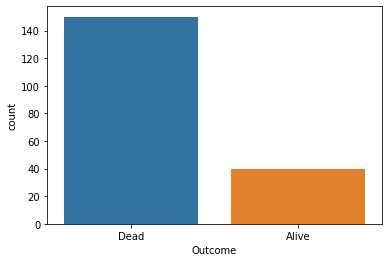

In [ ]:
import seaborn as sns
ax = sns.countplot(x="Outcome", data=df1)
ax.set_xticklabels(["Dead","Alive"])

After analysis of "N" and "M" columns in dataset I figured out few patterns to handle Null values. By doing many experiments I figured out that fitting Median value will handle missing values, I observed that this may leads to Overfitting. So, I performed RandomForest Classifier model to predict "M" and "N" missing values

Text(0, 0.5, 'Tumor_Size')

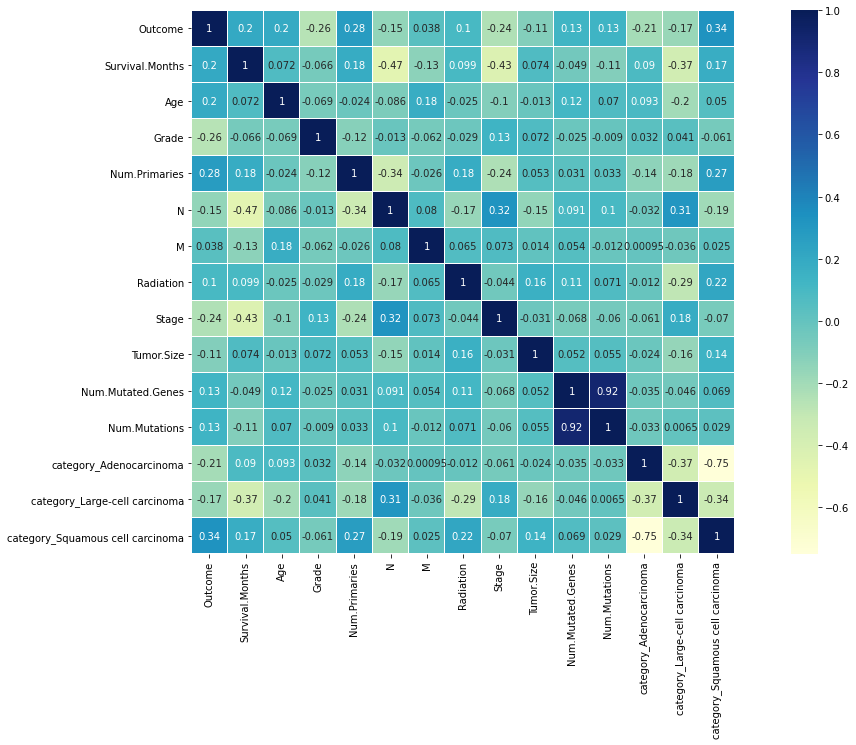

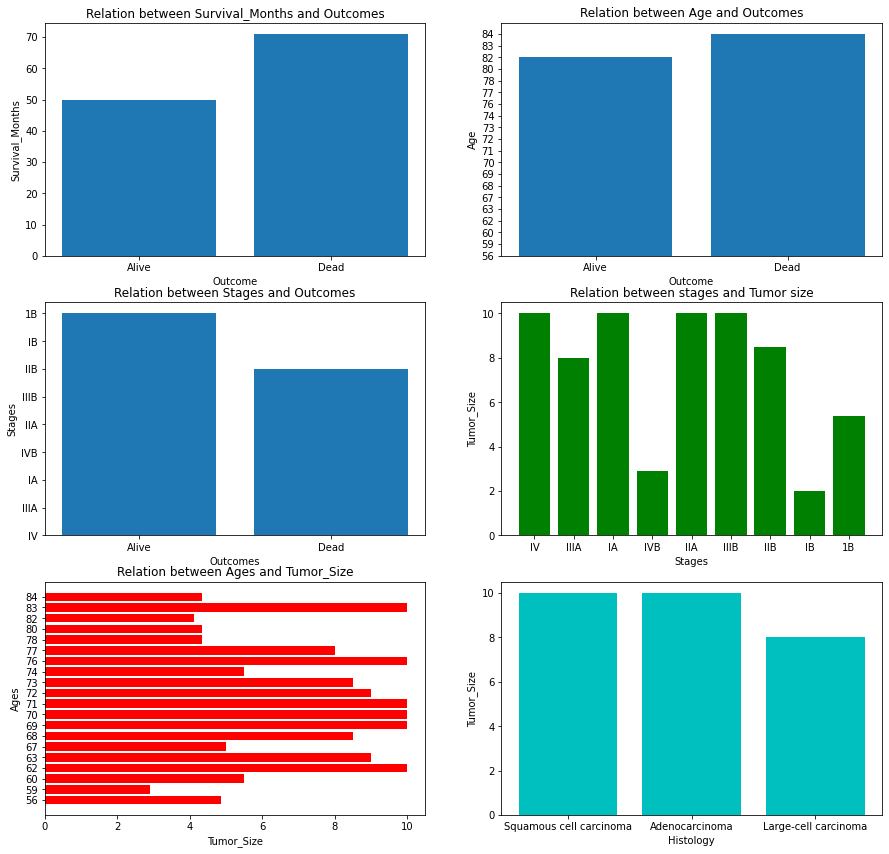

In [ ]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,square=True,cmap="YlGnBu",linewidths=0.10,linecolor='white')
print()
fig=plt.figure(figsize=(15,30)) # creating figure to plot graphs
ax1=fig.add_subplot(6,2,1) # Subplotting
ax1.bar(df['Outcome'],df1['Survival.Months'])
ax1.set_title("Relation between Survival_Months and Outcomes")
ax1.set_xlabel("Outcome")
ax1.set_ylabel("Survival_Months")
ax2=fig.add_subplot(6,2,2)
ax2.bar(df['Outcome'],df["Age"].sort_values(ascending=True).values)
ax2.set_title("Relation between Age and Outcomes")
ax2.set_xlabel("Outcome")
ax2.set_ylabel("Age")
ax3=fig.add_subplot(6,2,3)
ax3.set_title("Relation between Stages and Outcomes")
ax3.set_xlabel("Outcomes")
ax3.set_ylabel("Stages")
ax3.bar(df['Outcome'],df['Stage'])
ax4=fig.add_subplot(6,2,4)
ax4.bar(df["Stage"],df1["Tumor.Size"],color=['green'])
ax4.set_title("Relation between stages and Tumor size")
ax4.set_xlabel("Stages")
ax4.set_ylabel("Tumor_Size")
ax5=fig.add_subplot(6,2,5)
ax5.barh(df['Age'].sort_values(ascending=True).values,df['Tumor.Size'],color="r")
ax5.set_title("Relation between Ages and Tumor_Size")
ax5.set_xlabel("Tumor_Size")
ax5.set_ylabel("Ages")
ax6=fig.add_subplot(6,2,6)
ax6.bar(df1["Histology"],df1["Tumor.Size"],color='c')
ax6.set_xlabel("Histology")
ax6.set_ylabel("Tumor_Size")

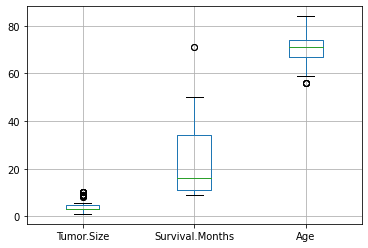

In [ ]:
df1.boxplot(column=["Tumor.Size","Survival.Months","Age"])

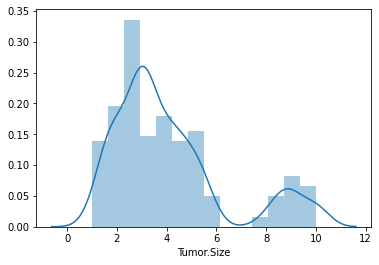

In [ ]:
sns.distplot(df1["Tumor.Size"])

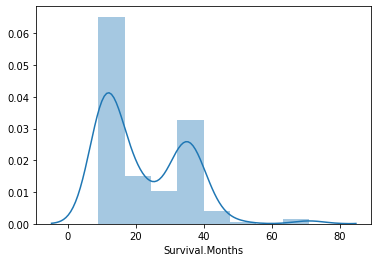

In [ ]:
sns.distplot(df1['Survival.Months'])

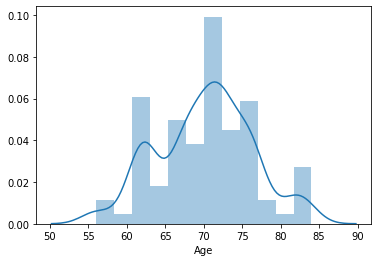

In [ ]:
sns.distplot(df1["Age"])

**Random Forest Feature Selection**

In [ ]:
#Fearure Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
df5=df1.drop(["ID","T","Primary.Site","Histology"],axis=1)
X=df5.iloc[:,1:].values
Y=df5['Outcome'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)#Train,Test split
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1,)
clf.fit(X_train, Y_train)#Model fitting

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
features=df1.columns.to_list()[2:]
for x in zip(features,clf.feature_importances_):
  print(x)

('Survival.Months', 0.030292256187008572)
('Age', 0.21523796313518306)
('Grade', 0.12390202890367302)
('Num.Primaries', 0.057533036840885586)
('T', 0.06802355148562038)
('N', 0.047549452558778564)
('M', 0.11064767770298907)
('Radiation', 0.12776719373630616)
('Stage', 0.07367736679750239)
('Primary.Site', 0.0767911784423194)
('Histology', 0.02102263235490755)
('Tumor.Size', 0.019088616608104122)
('Num.Mutated.Genes', 0.02846704524672204)


In [ ]:
#Model Prediction
y_prediction=clf.predict(X_test)
acc=accuracy_score(Y_test, y_prediction)
print(f"Accuracy : {round((acc)*100,2)}")

Accuracy : 80.95


In [ ]:
confusion_matrix(Y_test, y_prediction)

array([[46,  1],
       [11,  5]])

In [ ]:
#Feature Selection by giving Threshold Value

In [ ]:
sfm = SelectFromModel(clf, threshold=0.07)
sfm.fit(X_train, Y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(features[feature_list_index])

Survival.Months
Age
Stage


In [ ]:
#Model prediction after future Selection
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, Y_train)
y_pred = clf_important.predict(X_important_test)
future_score=accuracy_score(Y_test,y_pred)
print(f"Accuracy after future Selection : {round((future_score)*100,2)}")

Accuracy after future Selection : 82.54


In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_validate
scores = cross_validate(clf, X_important_train, Y_train, cv = 10)
CV_score=scores["test_score"].mean()
print(f"Mean Accuracy : {round((CV_score)*100,2)}")

Mean Accuracy : 87.5


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(classification_report(Y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88        47
           1       0.83      0.31      0.45        16

    accuracy                           0.81        63
   macro avg       0.82      0.65      0.67        63
weighted avg       0.81      0.81      0.78        63



In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
#MSE = np.square(np.subtract(y_test_data,y_predicted)).mean() 
print(f"Accuracy Prediction:{mean_squared_log_error(Y_test,abs(y_prediction))}")
print(f"MSLE Error rate: {mean_squared_log_error(Y_test,abs(y_prediction))}")
print(f"SMSE Error rate: {np.sqrt(mean_squared_error(Y_test,y_prediction))}")

Accuracy Prediction:0.09151485979394311
MSLE Error rate: 0.09151485979394311
SMSE Error rate: 0.4364357804719847


In [ ]:

def cross_entropy(predictions, targets, epsilon=1e-10):
    RFC_predictions = np.clip(prediction, epsilon, 1. - epsilon)
    N = RFC_predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(RFC_predictions + 1e-5)))/N
    return ce_loss
cross_entropy_loss = cross_entropy(y_prediction,Y_test)
print ("Cross entropy loss : " + str(cross_entropy_loss))

Cross entropy loss : 2.375680492789095


In [ ]:
#Model Visualization
from sklearn.tree import export_graphviz
from subprocess import call
import pydotplus
from subprocess import call
from IPython.display import Image
estimator=clf.estimators_[5]
X_col=df5.iloc[:,1:]
X_columns=X_col.columns
Y_col=df5.columns[0]
export_graphviz(estimator, out_file="tree.dot", 
                feature_names =X_columns,
                class_names =Y_col,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png', width=600)


**Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
df5=df1.drop(["ID","T","Primary.Site","Histology"],axis=1)
X=df5.iloc[:,1:].values
Y=df5['Outcome'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)#Train,Test split
clf = RandomForestClassifier(n_estimators=10,criterion = 'entropy',random_state=0, n_jobs=-1,)
clf.fit(X_train, Y_train)#Model fitting

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
estimators=RandomForestClassifier(n_jobs=-1)
parameters={'max_depth':[2,3,5,10,None],'n_estimators':[10,100,200,300,400,500],'criterion':['gini','entropy'],'bootstrap':[True,False],'min_samples_leaf':randint(1,4)}
def rf_hypertuning(estimators, parameters,iterations,X,Y):
    rdmsearch = RandomizedSearchCV(estimators,param_distributions=parameters,
                                  n_jobs=-1, n_iter=iterations,cv=9)
    rdmsearch.fit(X,Y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

Best_parameters, rf_best_score = rf_hypertuning(estimators,parameters,40,X,Y)
print(Best_parameters)
print(rf_best_score)


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 400}
0.8629148629148627


**Permutation Feature Importance**

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
X=df5.iloc[:,1:]
Y=df5['Outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)#Train,Test split
rf =RandomForestClassifier(n_jobs=-1, n_estimators=400,bootstrap= True,criterion='gini',max_depth=10,min_samples_leaf= 1).fit(X_train,Y_train)
feature_imp=PermutationImportance(rf, random_state=1).fit(X_train,Y_train)
columns=X_train.columns.tolist()
eli5.show_weights(feature_imp,feature_names=columns)

In [ ]:
columns

['Survival.Months',
 'Age',
 'Grade',
 'Num.Primaries',
 'N',
 'M',
 'Radiation',
 'Stage',
 'Tumor.Size',
 'Num.Mutated.Genes',
 'Num.Mutations',
 'category_Adenocarcinoma',
 'category_Large-cell carcinoma',
 'category_Squamous cell carcinoma']

In [ ]:
X_train

Survival.Months  ...  category_Squamous cell carcinoma
166             10.0  ...                                 0
59              13.0  ...                                 0
148             10.0  ...                                 0
5               11.0  ...                                 0
170             13.0  ...                                 0
..               ...  ...                               ...
13              29.0  ...                                 1
156             32.0  ...                                 1
70              13.0  ...                                 1
126             10.0  ...                                 0
85              22.0  ...                                 0

[127 rows x 14 columns]

In [ ]:
#Model2

In [ ]:
#SVM Model
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
df5=df1.drop(["ID","T","Primary.Site","Histology"],axis=1)
X=df5.iloc[:,1:].values
Y=df5['Outcome'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)#Train,Test split
svm =SVC(kernel='linear')
svm.fit(X_train, Y_train)#Model Fitting
pr=svm.predict(X_test)

In [ ]:
confusion_matrix(Y_test, pr)

array([[45,  2],
       [ 9,  7]])

In [ ]:
print(classification_report(Y_test, pr))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        47
           1       0.78      0.44      0.56        16

    accuracy                           0.83        63
   macro avg       0.81      0.70      0.73        63
weighted avg       0.82      0.83      0.81        63



In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_validate
scores = cross_validate(svm,X_train, Y_train, cv = 10)
sc=scores["test_score"].mean()
print(f"Accuracy Score : {round((sc)*100,2)}")

Accuracy Score : 80.32


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
#MSE = np.square(np.subtract(y_test_data,y_predicted)).mean() 
print(f"Accuracy Prediction:{mean_squared_log_error(Y_test,abs(pr))}")
print(f"MSLE Error rate: {mean_squared_log_error(Y_test,abs(pr))}")
print(f"SMSE Error rate: {np.sqrt(mean_squared_error(Y_test,pr))}")

Accuracy Prediction:0.0838886214777812
MSLE Error rate: 0.0838886214777812
SMSE Error rate: 0.41785544701867244


In [ ]:
def cross_entropy_SVM(pr, targets, epsilon=1e-10):
    SVM_predictions = np.clip(pr, epsilon, 1. - epsilon)
    N = SVM_predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(SVM_predictions + 1e-5)))/N
    return ce_loss
cross_entropy_loss_SVM = cross_entropy(pr,Y_test)
print ("Cross entropy loss is: " + str(cross_entropy_loss_SVM))

Cross entropy loss is: 2.375680492789095


In [ ]:
#Model 3

In [ ]:
#KNN Algoritham
from sklearn.neighbors import KNeighborsClassifier
df5=df1.drop(["ID","T","Primary.Site","Histology"],axis=1)
X=df5.iloc[:,1:].values
Y=df5['Outcome'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)#Train,Test split
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')#Model building
knn_model.fit(X_train,Y_train)#Model Fitting
prediction=knn_model.predict(X_test)#Model Prediction



In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_validate
cross_validation_scores = []
neighbors = list(np.arange(2,50,1))
for value in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors = value, metric='euclidean')
    scores = cross_validate(knn_model,X_train, Y_train, cv = 10)
    cross_validation_scores .append(scores["test_score"].mean())
error = [1-x for x in cross_validation_scores]
optimal_k = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_k, metric='euclidean')
knn_optimal.fit(X_train, Y_train)
y_prediction = knn_optimal.predict(X_test)
accuracy = accuracy_score(Y_test, y_prediction)
print(f"Accuracy Score : {round((accuracy)*100)}")
print("The accuracy for optimal k = {0} using euclidean is {1}".format(optimal_k, accuracy))

Accuracy Score : 84.0
The accuracy for optimal k = 5 using euclidean is 0.8412698412698413


In [ ]:
confusion_matrix(Y_test, prediction)

array([[52,  0],
       [10,  1]])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        52
           1       1.00      0.09      0.17        11

    accuracy                           0.84        63
   macro avg       0.92      0.55      0.54        63
weighted avg       0.87      0.84      0.78        63



In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
print(f"Accuracy Prediction:{mean_squared_log_error(Y_test,abs(prediction))}")
print(f"MSLE Error rate: {mean_squared_log_error(Y_test,abs(prediction))}")
print(f"SMSE Error rate: {np.sqrt(mean_squared_error(Y_test,prediction))}")

Accuracy Prediction:0.07626238316161928
MSLE Error rate: 0.07626238316161928
SMSE Error rate: 0.3984095364447979


In [ ]:
def cross_entropy(predictions, targets, epsilon=1e-10):
    Knn_predictions = np.clip(prediction, epsilon, 1. - epsilon)
    N = Knn_predictions.shape[0]
    ce_loss = -np.sum(np.sum(targets * np.log(Knn_predictions + 1e-5)))/N
    return ce_loss
cross_entropy_loss = cross_entropy(prediction,Y_test)
print ("Cross entropy loss is: " + str(cross_entropy_loss))

Cross entropy loss is: 1.8274467404817822


<Figure size 432x288 with 0 Axes>

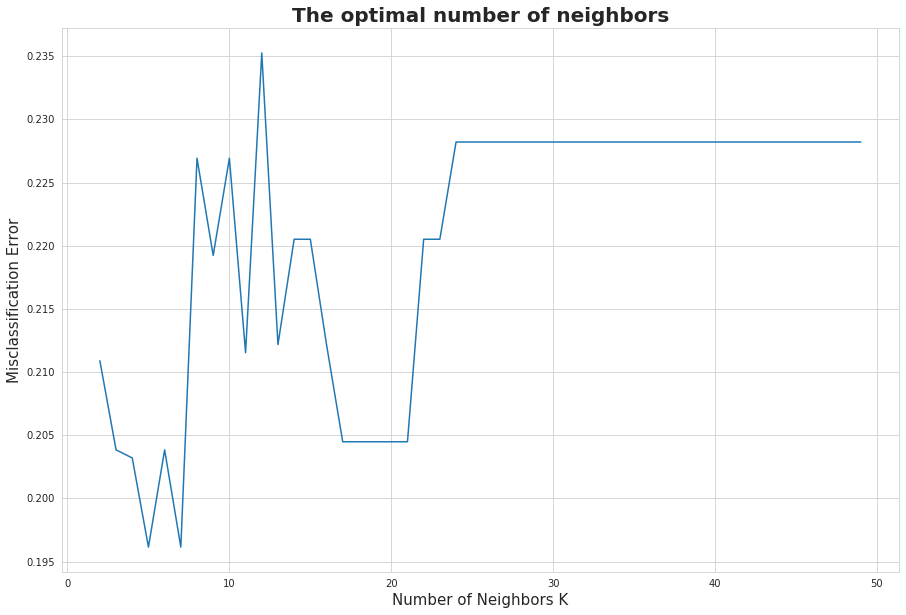

In [ ]:
#Visualization
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(neighbors, error)
plt.show()

After performing different model on the data I can observe that Random Forest Classification model is perfect fit for analysis

FUTURE STEPS:
Here, I used some of the Classification techniques to predict the outcome based on given features such as Stages of cancer, Histology, Tumor size, Radiation and predcict the outcome. Similarly, we can use the classification techniques in the health industry to find whether the person can be affected with diseases such as Blood pressure, Diabetes based on family history. We can apply classification techniques in different industries such as sales, Ecommerce.